In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import pandas as pd

In [4]:
train_df = pd.read_csv('x_train.csv', sep=';', encoding='utf-8')
test_df = pd.read_csv('x_test.csv', sep=';', encoding='utf-8')
train_y = pd.read_csv('y_train.csv', sep=';', encoding='utf-8', header=None)

train_df['target'] = train_y
train_df, train_y = shuffle(train_df, train_y, random_state=42)

train_df.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
4843,8,9,1,10,15.111111,0,2,0.500000,1939000,1875,20,2,0
14687,2,3,1,3,5.000000,0,0,0.000000,251000,500,6,1,0
19666,6,7,1,11,9.333333,0,2,0.500000,1199000,1500,18,1,0
25092,11,12,2,15,14.000000,0,2,0.500000,2865000,2100,29,1,0
3703,27,28,1,65,16.740741,0,14,0.571429,6999000,4925,64,4,0


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

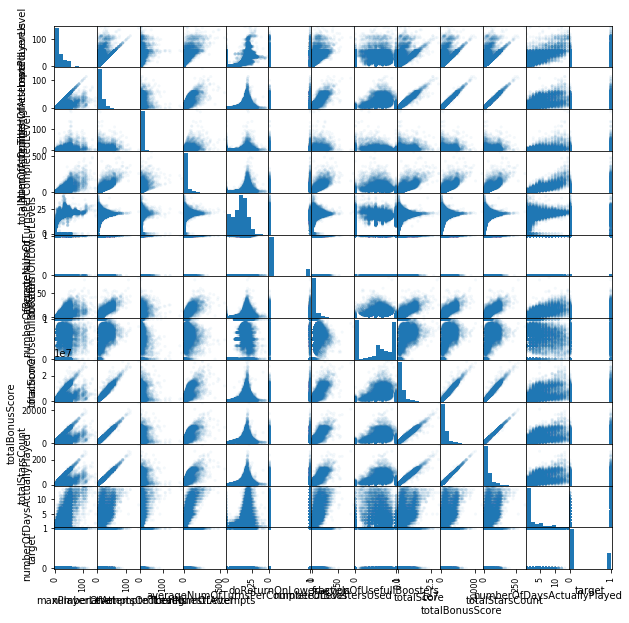

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df, alpha=0.05, figsize=(10, 10));

Посмотрим как отдельные признаки коррелируют между собой

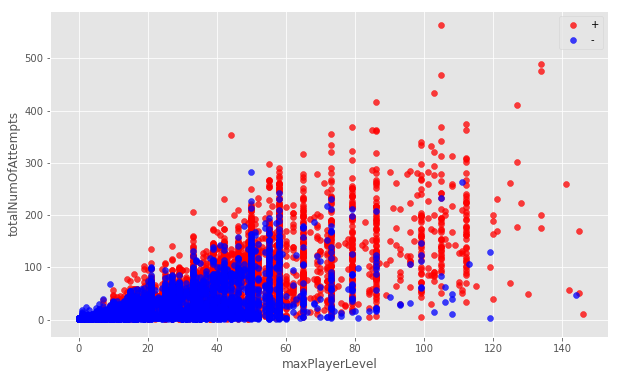

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
col1 = 'maxPlayerLevel'
col2 = 'totalNumOfAttempts'

plt.figure(figsize=(10, 6))

plt.scatter(train_df[col1][train_df['target'] == 1],
            train_df[col2][train_df['target'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(train_df[col1][train_df['target'] == 0],
            train_df[col2][train_df['target'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

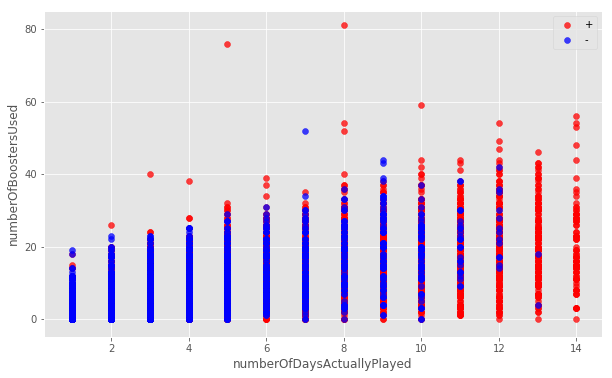

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
col1 = 'numberOfDaysActuallyPlayed'
col2 = 'numberOfBoostersUsed'

plt.figure(figsize=(10, 6))

plt.scatter(train_df[col1][train_df['target'] == 1],
            train_df[col2][train_df['target'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(train_df[col1][train_df['target'] == 0],
            train_df[col2][train_df['target'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

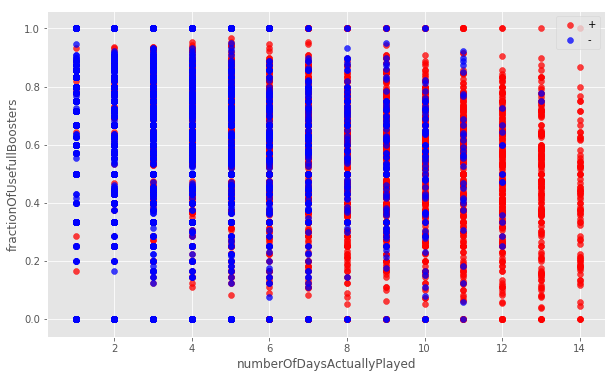

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
col1 = 'numberOfDaysActuallyPlayed'
col2 = 'fractionOfUsefullBoosters'

plt.figure(figsize=(10, 6))

plt.scatter(train_df[col1][train_df['target'] == 1],
            train_df[col2][train_df['target'] == 1],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(train_df[col1][train_df['target'] == 0],
            train_df[col2][train_df['target'] == 0],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

train_X.describe()

In [ ]:
train_X.corr()

## Пропущенные значения

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [ ]:
train_X.count(axis=0)

Вывод - пропуенные значения отсутсвуют.

# Сравните качество логистической регресии с и без предварительной нормализации признаков.

In [ ]:
train_y=train_df['target']
clf = Pipeline([
    ('normalizer', StandardScaler()),
    ('clf', LogisticRegression()),
])

score = cross_val_score(clf, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))

Конспект

Логистическая регрессия — одно из статистических методов классификации с использованием линейного дискриминанта Фишера.
Значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.
механизм обучения логистической регрессии старается максимизировать среднее значение image.

In [ ]:
train_y=train_df['target']
clf = Pipeline([
    ('clf', LogisticRegression()),
])

score = cross_val_score(clf, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))

# Random Forest – случайный лес¶

In [ ]:
train_y=train_df['target']
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=300, random_state=11)
rf.fit(train_X, train_y)

prediction_probas = rf.predict_proba(test_X)[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submissionRANDFOR.csv', header=None, index=None, encoding='utf-8')


Запустить алгоритм с разными seed и взять средний результат.(лучший результат эта штучка не дала, но идея прикольная)

In [ ]:
import numpy as np
import pandas as pd
train_y=train_df['target']
from sklearn.ensemble import RandomForestClassifier
runs = 1000
results = np.zeros((runs, test_X.shape[0]))
for i in range(runs):
    clf = RandomForestClassifier(random_state=2707+i)
    clf.fit(train_X, train_y)
results[i, :]=clf.predict_proba(test_X)[:,1]
result = results.mean(axis=0)
print(result)

In [ ]:

train_y = pd.DataFrame({'probability': result})
train_y.to_csv('predictions/11111.csv', header=None, index=None, encoding='utf-8')

In [ ]:

#prediction_probas = gbt.predict_proba(test_X)[:,1]
#train_y = pd.DataFrame({'probability': prediction_probas})
#train_y.to_csv('predictions/submission4.csv', header=None, index=None, encoding='utf-8')

много раз выбрать случайно параметр из данного отрезка, померить качество алгоритма при данном параметре и выбрать тем самым луйший:

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

In [ ]:
import numpy as np
train_y=train_df['target']
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.grid_search import RandomizedSearchCV
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(train_X, train_y)

prediction_probas = rsearch.predict_proba(test_X)[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/22222.csv', header=None, index=None, encoding='utf-8')
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

# DecisionTreeClassifier

In [ ]:
train_y=train_df['target']
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
score = cross_val_score(tree, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)
tree.fit(train_X, train_y)

prediction_probas = tree.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))
#print (tree)
#print (tree.score(train_X, train_y))

In [ ]:
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission1.csv', header=None, index=None, encoding='utf-8')

In [ ]:
train_y=train_df['target']
clf = Pipeline([
    ('normalizer', StandardScaler()),
    ('clf', LogisticRegression()),
])

score = cross_val_score(clf, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))

Отбор значимых признаков осуществляется как «вручную» — на основе анализа содержательной постановки задачи, так и «автоматически» — с помощью универсальных алгоритмов.

Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. Рассмотрим только один из них – с помощью случайного леса.

Все, что нужно сделать, – это после вызова метода predict для случайного леса прочитать поле feature_importances_. Для каждого признака это поле содержит число, выражающее «важность» этого признака. Чем больше число, тем значимее признак. Сумма всех чисел равна 1.

Упорядочим значимости и выведем их значения:

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(train_X, train_df['target'])
print(model)
# make predictions
expected = train_df['target']
predicted = model.predict(train_X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [ ]:
import numpy as np
feature_names = train_X.columns
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train_X, train_df['target'])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

In [ ]:
d_first = 12
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [ ]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)


# GBT – градиентный бустинг деревьев решений¶ (BEST)

In [ ]:
train_y=train_df['target']
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X, train_y)

prediction_probas = gbt.predict_proba(test_X)[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission4.csv', header=None, index=None, encoding='utf-8')

Просто добавь кросс-валидацию

In [ ]:
train_y=train_df['target']
from sklearn import ensemble
gbt = Pipeline([
    ('normalizer', StandardScaler()),
    ('gbt', ensemble.GradientBoostingClassifier(learning_rate=0.06761662249589584,n_estimators=100, random_state=42)),
])

score = cross_val_score(gbt, train_X, train_y, scoring='log_loss', cv=8, n_jobs=-1)
gbt.fit(train_X, train_y)
prediction_probas = gbt.predict_proba(test_X)[:,1]




In [ ]:
score = cross_val_score(gbt, train_X, train_y, scoring='accuracy', cv=8, n_jobs=-1)

print("{} +/- {}".format(score.mean(), score.std()))

In [ ]:
gbt.get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {  
              'gbt_loss' : ('deviance', 'exponential')
}

gs_clf = GridSearchCV(gbt, parameters, n_jobs=-1)

In [ ]:
gs_clf = gs_clf.fit(train_X, train_y)

In [ ]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

In [ ]:

train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/new.csv', header=None, index=None, encoding='utf-8')

Дальше идут пробы различных туториалов для Scikit-Learn

Нормализация данных

Всем хорошо знакомо, что большинство градиентных методов (на которых по-сути и основаны почти все алгоритмы машинного обучения) сильно чуствительны к шкалированию данных. Поэтому перед запуском алгоритмов чаще всего делается либо нормализация, либо так называемая стандартизация. Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. Стандартизация же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1. В Scikit-Learn уже есть готовые для этого функции:

In [ ]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(train_X)
# standardize the data attributes
standardized_X = preprocessing.scale(train_X)

Отбор признаков

Не секрет, что зачастую самым важным при решении задачи является умение правильно отобрать и даже создать признаки. В англоязычной литературе это называется Feature Selection и Feature Engineering. В то время как Future Engineering довольно творческий процесс и полагается больше на интуицию и экспертные знания, для Feature Selection есть уже большое количество готовых алгоритмов. «Древесные» алгоритмы допускают расчета информативности признаков:

In [ ]:
train_y=train_df['target']

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_X, train_y)
# display the relative importance of each attribute
print(model.feature_importances_)

Все остальные методы так или иначе основаны на эффективном переборе подмножеств признаков с целью найти наилучшее подмножество, на которых построенная модель дает наилучшее качество. Одним из таких алгоритмов перебора является Recursive Feature Elimination алгоритм, который также доступен в библиотеке Scikit-Learn:

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(train_X, train_y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.grid_search import RandomizedSearchCV
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(train_X, train_y)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
random_forest_classifier = rsearch.best_estimator_
decision_tree_classifier = rsearch.best_estimator_
#grid_search.fit(all_inputs, all_classes)
rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, train_X,train_y, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier,train_X,train_y, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

clf.fit(train_X, train_y)
prediction_probas = clf.predict_proba(test_X)[:,1]
print("{} +/- {}".format(score.mean(), score.std()))
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission.csv', header=None, index=None, encoding='utf-8')


In [ ]:
a=[0,1,2,3,4]
best_features = indices[a]
best_features_names = feature_names[best_features]

import numpy as np
feature_names = train_X.columns
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train_X, train_df['target'])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
best_features = indices[a]
best_features_names = feature_names[best_features]


Тут я взяла сначала два самых важных признака, по очереди добавляла остальные, если прогноз ухудшался - то признак отбрасывался. Лучше не стало.

In [ ]:
print(indices[a])


In [ ]:

train_y=train_df['target']
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X[best_features_names], train_y)

prediction_probas = gbt.predict_proba(test_X[best_features_names])[:,1]
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submissionimp.csv', header=None, index=None, encoding='utf-8')

err_train = np.mean(train_df['target'] != gbt.predict(train_X[best_features_names]))
err_test = np.mean(prediction_probas  != gbt.predict(test_X[best_features_names]))
print(err_train, err_test)


In [ ]:
%matplotlib inline
train_y=train_df['target']

import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

#train_df = pd.read_csv('data/x_train.csv', sep=';', encoding='utf-8')
#test_df = pd.read_csv('data/x_test.csv', sep=';', encoding='utf-8')
#train_y = pd.read_csv('data/y_train.csv', sep=';', encoding='utf-8', header=None)

random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
#rf_classifier_scores = cross_val_score(random_forest_classifier, train_X, train_y, cv=10)
#sb.boxplot(rf_classifier_scores)
#sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(train_X, train_y, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

prediction_probas = random_forest_classifier.predict_proba(test_X)[:,1]

print("{} +/- {}".format(score.mean(), score.std()))
train_y = pd.DataFrame({'probability': prediction_probas})
train_y.to_csv('predictions/submission.csv', header=None, index=None, encoding='utf-8')

In [ ]:
import numpy as np
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
import random


train_y=train_df['target']

from sklearn.preprocessing import MinMaxScaler
submiss = pd.read_csv('data/x_test.csv', sep=';', encoding='utf-8')
cols_to_drop = ['ID', 'TARGET']
cols = list(set(train_X.columns) - set(cols_to_drop))
scaler_reg = MinMaxScaler((-1, 1))
scaler_reg.fit(np.vstack((train_X[cols], submiss[cols])))
X_train_reg = scaler_reg.transform(train_X[cols])
submiss_reg = scaler_reg.transform(submiss[cols])

In [ ]:

train_y=train_df['target']
bst5 = LogisticRegression()
bst5.fit(X_train_reg, train_y)

In [ ]:
train_y=train_df['target']
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(train_X, train_y)



In [ ]:

t3 = np.asarray([[i] for i in  gbt.predict_proba(train_X)[:,1]])
t5 = np.asarray([[i] for i in  clf.predict_proba(train_X)[:,1]])
tst_data = np.hstack((
    t3,
    t5,
))


itog = np.mean(tst_data , axis=1)

sub_df = pd.DataFrame(data=train_df['target'])
sub_df.to_csv('itog.csv', index=False, header=False)



